In [1]:
import numpy as np 
import scipy.sparse as sps 
import matplotlib.pyplot as plt

data = np.array([[1, 2, 3, 4]]).repeat(3, axis=0)
offsets = np.array([0, -1, 2]) 
mtx = sps.dia_matrix((data, offsets), shape=(4, 4)) 
print mtx


SyntaxError: Missing parentheses in call to 'print'. Did you mean print(...)? (1615128832.py, line 8)

Content-Type: audio/wav
Last-Modified: Tue, 12 Aug 2014 15:53:38 GMT
Accept-Ranges: bytes
ETag: "ac20ba9445b6cf1:0"
Server: Microsoft-IIS/8.5
X-Powered-By: ASP.NET
Date: Thu, 21 Jan 2021 10:26:56 GMT
Connection: close
Content-Length: 43642

('Data type', dtype('uint8'), 'Shape', (43584L,))


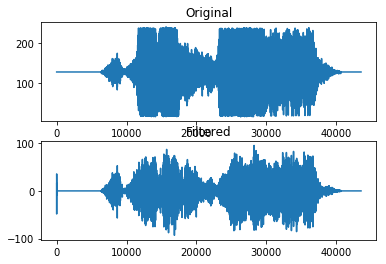

In [2]:
import scipy.io.wavfile
import matplotlib.pyplot as plt
import urllib2
import scipy.signal

response = urllib2.urlopen('http://www.thesoundarchive.com/austinpowers/smashingbaby.wav')
print response.info()
WAV_FILE = 'smashingbaby.wav'
filehandle = open(WAV_FILE, 'w')
filehandle.write(response.read())
filehandle.close()
sample_rate, data = scipy.io.wavfile.read(WAV_FILE)
print("Data type", data.dtype, "Shape", data.shape)

plt.subplot(2, 1, 1)
plt.title("Original")
plt.plot(data)

# Design the filter
b,a = scipy.signal.iirdesign(wp=0.2, ws=0.1, gstop=60, gpass=1, ftype='butter')

# Filter
filtered = scipy.signal.lfilter(b, a, data)

# Plot filtered data
plt.subplot(2, 1, 2)
plt.title("Filtered")
plt.plot(filtered)

scipy.io.wavfile.write('filtered.wav', sample_rate, filtered.astype(data.dtype))

plt.show()

In [3]:
import scipy.io.wavfile
import matplotlib.pyplot as plt
import urllib2
import scipy.signal

response = urllib2.urlopen('http://www.thesoundarchive.com/austinpowers/smashingbaby.wav')
print response.info()
WAV_FILE = 'smashingbaby.wav'
filehandle = open(WAV_FILE, 'w')
filehandle.write(response.read())
filehandle.close()
sample_rate, data = scipy.io.wavfile.read(WAV_FILE)
print("Data type", data.dtype, "Shape", data.shape)

plt.subplot(2, 1, 1)
plt.title("Original")
plt.plot(data)

# Design the filter
b,a = scipy.signal.iirdesign(wp=0.2, ws=0.1, gstop=60, gpass=1, ftype='butter')

# Filter
filtered = scipy.signal.lfilter(b, a, data)

# Plot filtered data
plt.subplot(2, 1, 2)
plt.title("Filtered")
plt.plot(filtered)

scipy.io.wavfile.write('filtered.wav', sample_rate, filtered.astype(data.dtype))

plt.show()


SyntaxError: Missing parentheses in call to 'print'. Did you mean print(...)? (3304895354.py, line 7)

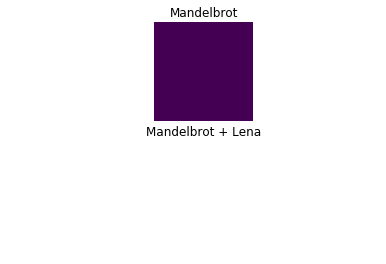

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import face

ITERATIONS = 10
lena = face()
SIZE = lena.shape[0]
MAX_COLOR = 255.
x_min, x_max = -2.5, 1
y_min, y_max = -1, 1

# Initialize arrays
x, y = np.meshgrid(np.linspace(x_min, x_max, SIZE),
                   np.linspace(y_min, y_max, SIZE))
c = x + 1j * y
z = c.copy()
fractal = np.zeros(z.shape, dtype=np.uint8) + MAX_COLOR

# Generate fractal
for n in range(ITERATIONS):
    mask = np.abs(z) <= 4 
    z[mask] = z[mask] ** 2 +  c[mask]
   # fractal[(fractal == MAX_COLOR) & (-mask)] = (MAX_COLOR - 1) * n / ITERATIONS

# Display the fractal
plt.subplot(211)
plt.imshow(fractal)
plt.title('Mandelbrot')
plt.axis('off')

# Combine with lena
plt.subplot(212)
#plt.imshow(np.choose(fractal < lena, [fractal, lena]))
plt.axis('off')
plt.title('Mandelbrot + Lena')

plt.show()


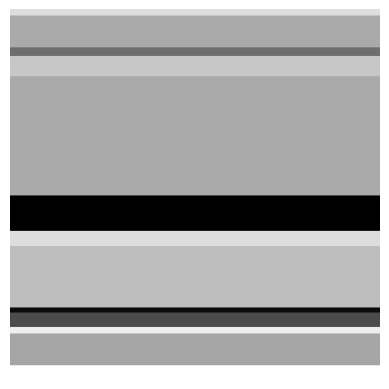

In [11]:
import numpy as np
import matplotlib.pyplot as plt

N = 512
NSQUARES = 30

# Initialize
img = np.zeros((N, N), np.uint8)
centers = np.random.randint(0, N, size=(NSQUARES, 2))
radii = np.random.randint(0, N // 9, size=NSQUARES)
colors = np.random.randint(100, 255, size=NSQUARES)

# Generate squares
for i in range(NSQUARES):
    xindices = range(centers[i][0] - radii[i], centers[i][0] + radii[i])
    xindices = np.clip(xindices, 0, N - 1)
    yindices = range(centers[i][1] - radii[i], centers[i][1] + radii[i])
    yindices = np.clip(yindices, 0, N - 1)

    if len(xindices) == 0 or len(yindices) == 0:
        continue

    coordinates = np.meshgrid(xindices, yindices)
    img[coordinates] = colors[i]

# Load into memory map
img.tofile('random_squares.raw')
img_memmap = np.memmap('random_squares.raw', dtype=np.uint8, shape=img.shape)

# Display image
plt.imshow(img_memmap, cmap='gray')
plt.axis('off')
plt.show()


Content-Type: audio/wav
Last-Modified: Tue, 12 Aug 2014 15:53:40 GMT
Accept-Ranges: bytes
ETag: "01ad89545b6cf1:0"
Server: Microsoft-IIS/10.0
X-Powered-By: ASP.NET
Date: Sat, 15 Jun 2024 07:49:14 GMT
Connection: close
Content-Length: 43642


Data type uint8 Shape (43584,)


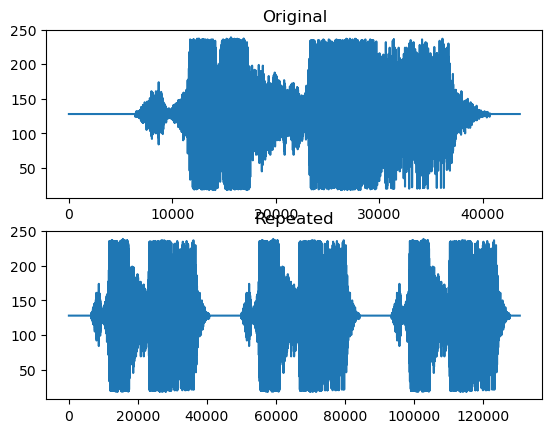

In [15]:
import scipy.io.wavfile
import matplotlib.pyplot as plt
import urllib.request
import numpy as np

# Download the audio file
url = 'http://www.thesoundarchive.com/austinpowers/smashingbaby.wav'
response = urllib.request.urlopen(url)
print(response.info())
WAV_FILE = 'smashingbaby.wav'

with open(WAV_FILE, 'wb') as filehandle:
    filehandle.write(response.read())

# Read the wav file
sample_rate, data = scipy.io.wavfile.read(WAV_FILE)
print("Data type", data.dtype, "Shape", data.shape)

plt.subplot(2, 1, 1)
plt.title("Original")
plt.plot(data)

plt.subplot(2, 1, 2)

# Repeat the audio fragment
repeated = np.tile(data, 3)

# Plot the audio data
plt.title("Repeated")
plt.plot(repeated)

# Write the repeated audio to a new file
scipy.io.wavfile.write("repeated_yababy.wav", sample_rate, repeated)

plt.show()


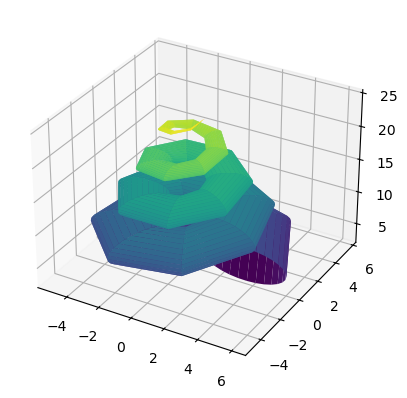

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# http://en.wikipedia.org/wiki/Seashell_surface

u = np.linspace(0, 2 * np.pi, 30)
v = np.linspace(-2 * np.pi, 2 * np.pi, 30)

u, v = np.meshgrid(u, v)

first_term = (5./4) * (1 - v/(2 * np.pi))
second_term = (1 + np.cos(u))
x = first_term * np.cos(2 * v) * second_term + np.cos(2 * v)
y = first_term * np.sin(2 * v) * second_term + np.sin(2 * v)
z = 5 * v / np.pi + first_term * np.sin(u) + 15

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, z, cmap='viridis')

plt.show()


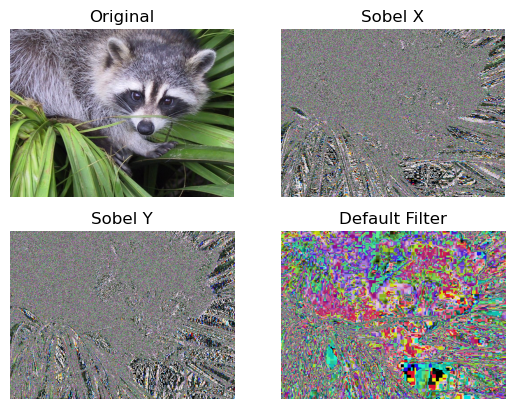

In [27]:
import scipy
import scipy.ndimage
import matplotlib.pyplot as plt

lena = scipy.datasets.face()

plt.subplot(221)
plt.imshow(lena)
plt.title('Original')
plt.axis('off')

# Sobel X filter
sobelx = scipy.ndimage.sobel(lena, axis=0, mode='constant')

plt.subplot(222)
plt.imshow(sobelx)
plt.title('Sobel X')
plt.axis('off')

# Sobel Y filter
sobely = scipy.ndimage.sobel(lena, axis=1, mode='constant')

plt.subplot(223)
plt.imshow(sobely)
plt.title('Sobel Y')
plt.axis('off')

# Default Sobel filter
default = scipy.ndimage.sobel(lena)

plt.subplot(224)
plt.imshow(default)
plt.title('Default Filter')
plt.axis('off')

plt.show()
